In [10]:
import eyes
from eyes import Eyes,Cpu,Nginx,Mem,Disk
import matplotlib.pyplot as plt
import plot_utils
from plot_utils import Roller,LogFile,Fig
import rolling_funcs as fn

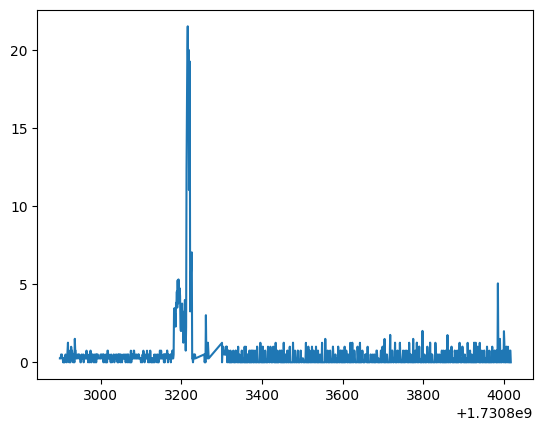

In [4]:
with open("./telegraf.json","r") as f:
    eyes = Eyes(f.readlines())

cpu: Cpu = eyes.streams['CPU']
times,usage = list(zip(*[(el.timestamp, el.fields.usage_system) for el in cpu]))
plt.plot(times, usage)

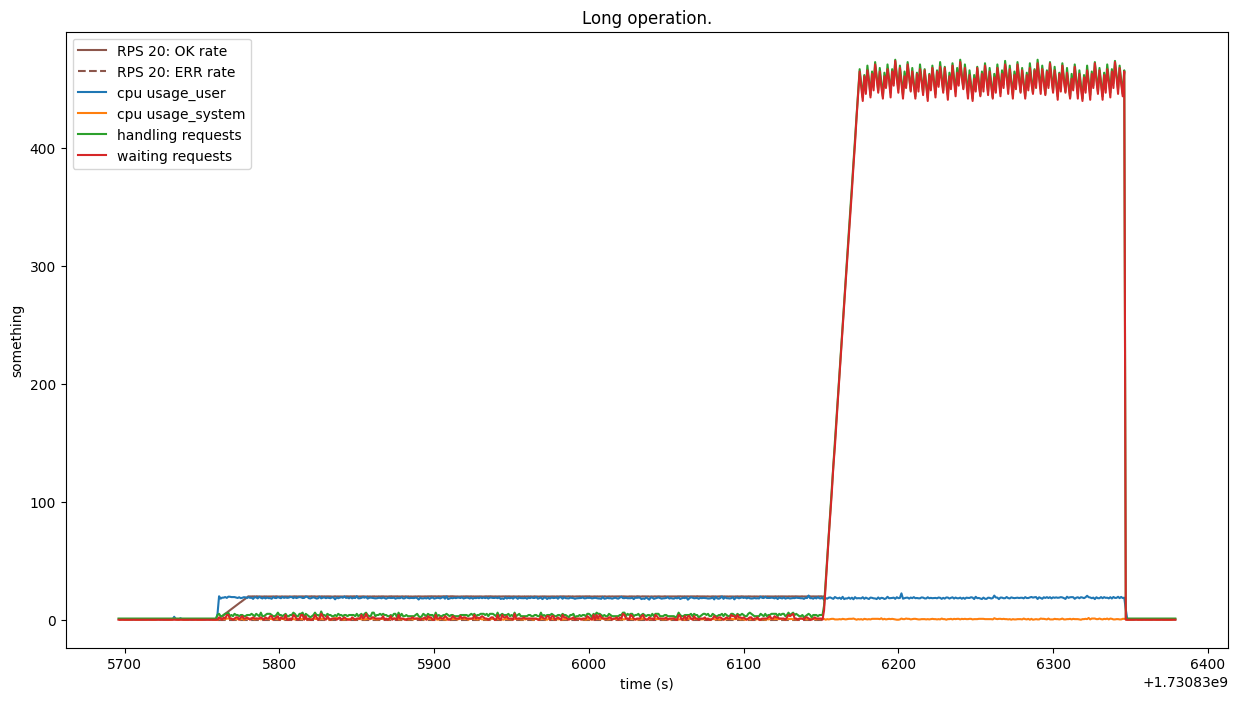

In [ ]:
got_log = {
    "RPS 20" : LogFile(path="./logs/kleene/2024-11-05_19-42-39.899347.txt", kwargs={'color':'tab:brown'}),
}
both_rollers = [
    Roller("OK rate", fn.count_ok, rate=True),
   Roller("ERR rate", fn.count_err, rate=True,kwargs={'linestyle':'--'}) 
]
fig,ax = plot_utils.fig([Fig(title="Long operation.", x='time (s)', y='something')])
plot_utils.overlay(ax,got_log,both_rollers, 20.0, const_stride_secs=0.5)

with open("./logs/hilbert/2024-11-05_19-42.json","r") as f:
    eyes = Eyes(f.readlines())

cpu: Cpu = eyes.streams['CPU']
mem: Mem = eyes.streams['MEM']
disk: Disk = eyes.streams['DISK']
nginx: Nginx = eyes.streams['NGINX']

times,buffered = list(zip(*[(el.timestamp, el.fields.buffered) for el in mem]))
# ax.plot(times, buffered,label="buffered mem")
times,buffered = list(zip(*[(el.timestamp, el.fields.usage_user) for el in cpu]))
ax.plot(times, buffered,label="cpu usage_user")
times,buffered = list(zip(*[(el.timestamp, el.fields.usage_system) for el in cpu]))
ax.plot(times, buffered,label="cpu usage_system")
times,handling = list(zip(*[(el.timestamp, el.fields.active) for el in nginx]))
ax.plot(times, handling, label="handling requests")
times,waiting = list(zip(*[(el.timestamp, el.fields.waiting) for el in nginx]))
ax.plot(times,waiting, label="waiting requests")

# ax.set_xlim(1730835700,1730836150)
# ax.set_ylim(0,30)
ax.legend()